# <u>Customer Segmentation using clustering based on RFM parameters</u>

Importing required libraries:-

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
%matplotlib inline
from matplotlib import cm
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from random import sample
from numpy.random import uniform
from math import isnan
 

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score


Loading the data :-

In [153]:
df= pd.read_excel('dataset.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Checking the shape of the dataset :-

In [154]:
print("Shape of the dataset:- ", df.shape)

Shape of the dataset:-  (2240, 29)


From the above output, we can see that there are 2240 records and 29 fields.

Checking the data type of the variables :-

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

From the above output, we can see that there are missing values in income field. Removing records with missing values:- 

In [156]:
df.dropna(inplace= True)
print(df.shape)

(2216, 29)


After removing the missing values, there are 2216 rows with 29 columns. Confirming there are no missing values:-

In [157]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


# Feature Engineering:-

### Feature Engineering is the process of extracting new features from the existing variables in the given dataset.
#### Age, Total purchases and Total Money spent is extracted from the variables.

In [158]:
df['Age'] = 2022 - df['Year_Birth']
df['Total_purchases'] =df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] +df['NumStorePurchases']
df['Total_money_spent'] = df['MntWines'] + df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts'] + df['MntGoldProds']

Checking the unique values under 'Education' :-

In [159]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Replacing the values under 'Education' :-

In [160]:
df['Education'] = df['Education'].replace({"Graduation":"Graduate" , "PhD": "Postgraduate" , "Master" : "Postgraduate", "Basic" : "Undergraduate" , "2n Cycle" : "Postgraduate"})
df['Education'].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

generating descriptive statistics for the variables :-

In [161]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_purchases,Total_money_spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,53.179603,14.880866,607.075361
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,7.670957,602.900476
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,0.000000,5.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,8.000000,69.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000,15.000000,396.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,21.000000,1048.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000,44.000000,2525.000000


From the above output , it is seen that there are outliers in age and income. Therefore removing them:-

In [162]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

## RFM Analysis

#### RFM  Model is a segmentation model consisting of three measures - Recency, Frequency and Monetary which is combined into a 3 digit RFM code.

#### R - Recency - How recent was the customer's purchase?  

#### F - Frequency - How often does this customer make a purchase?  

#### M - Monetary - How much did the customer spend in the given time period?  


Extracting Recency from the dataset :-

In [163]:
RFM_recency = df['Recency']
RFM_recency = RFM_recency.reset_index()
RFM_recency.columns = ['ID', 'Recency']
RFM_recency.head()

,ID,Recency
0,0,58
1,1,38
2,2,26
3,3,26
4,4,94


Calculating frequency as the sum of number of all the purchases:-



In [164]:
RFM_frequency = df['Total_purchases']
RFM_frequency = RFM_frequency.reset_index()
RFM_frequency.columns =['ID','Frequency']
RFM_frequency.head()

,ID,Frequency
0,0,25
1,1,6
2,2,21
3,3,8
4,4,19


Calculating Monetary as the sum of the amount spent on all products:-

In [169]:
RFM_monetary = df['Total_money_spent']
RFM_monetary = RFM_monetary.reset_index()
RFM_monetary.columns = ['ID', 'Monetary']
RFM_monetary.head()

,ID,Monetary
0,0,1617
1,1,27
2,2,776
3,3,53
4,4,422


Combining Recency, Frequency and Monetary variables in a single dataframe :-

In [170]:
RFM = pd.merge(RFM_recency, RFM_frequency, on='ID', how='inner')
RFM.head()

,ID,Recency,Frequency
0,0,58,25
1,1,38,6
2,2,26,21
3,3,26,8
4,4,94,19


In [171]:
RFM = pd.merge(RFM, RFM_monetary, on='ID', how='inner')
RFM.head()

,ID,Recency,Frequency,Monetary
0,0,58,25,1617
1,1,38,6,27
2,2,26,21,776
3,3,26,8,53
4,4,94,19,422


Checking the descriptive statistics of the RFM score:-

In [172]:
RFM.describe()

,ID,Recency,Frequency,Monetary
count,2212.000000,2212.000000,2212.000000,2212.000000
mean,1122.538427,49.019439,14.891501,607.268083
std,642.517593,28.943121,7.671629,602.513364
min,0.000000,0.000000,0.000000,5.000000
25%,568.750000,24.000000,8.000000,69.000000
50%,1121.500000,49.000000,15.000000,397.000000
75%,1678.250000,74.000000,21.000000,1048.000000
max,2239.000000,99.000000,44.000000,2525.000000


Checking outliers using boxplot :-

<AxesSubplot: >

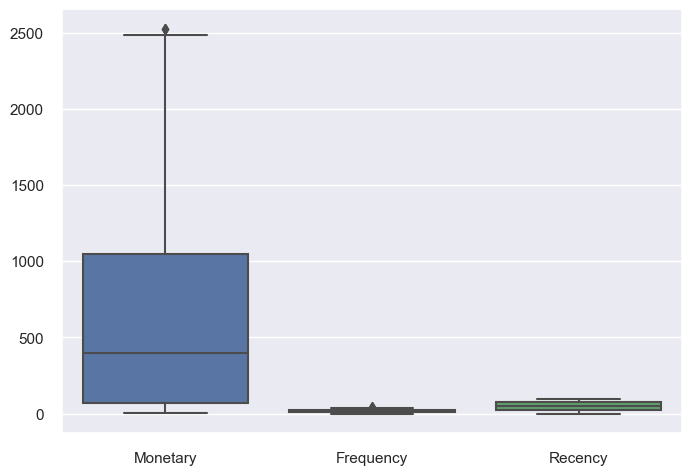

In [173]:
variables = ['Monetary','Frequency','Recency']
sns.boxplot(data= RFM[variables])

From the above plot, we can see that there are no outliers in the variables.

In [174]:
RFM.describe()

,ID,Recency,Frequency,Monetary
count,2212.000000,2212.000000,2212.000000,2212.000000
mean,1122.538427,49.019439,14.891501,607.268083
std,642.517593,28.943121,7.671629,602.513364
min,0.000000,0.000000,0.000000,5.000000
25%,568.750000,24.000000,8.000000,69.000000
50%,1121.500000,49.000000,15.000000,397.000000
75%,1678.250000,74.000000,21.000000,1048.000000
max,2239.000000,99.000000,44.000000,2525.000000


Splitting into four segments using quantile:-

In [175]:
Quantiles = RFM.quantile(q=[0.20,0.40,0.60,0.80])
Quantiles

,ID,Recency,Frequency,Monetary
0.2,458.2,19.0,7.0,55.0
0.4,900.4,39.0,12.0,198.0
0.6,1342.6,58.6,17.0,636.6
0.8,1788.8,79.0,22.0,1174.0


####  The customers are divided into 5 equal quantiles. 
#### For each of the three variables, top 20 % is coded as 5, next 20 % as 4 and so on.

Defining a function to create R,F and M segments :-

In [176]:
def RScoring(x,y,d):
    if x <= d[y][0.20]:
        return 1
    elif x <= d[y][0.40]:
        return 2
    elif x <= d[y][0.60]: 
        return 3
    elif x <= d[y][0.80]: 
        return 4
    else:
        return 5
    
def FandMScoring(x,y,d):
    if x <= d[y][0.20]:
        return 1
    elif x <= d[y][0.40]:
        return 2
    elif x <= d[y][0.60]: 
        return 3
    elif x <= d[y][0.80]: 
        return 4
    else:
        return 5

Calculating R,F,M segment values using the above function:-

In [177]:
RFM['R'] = RFM['Recency'].apply(RScoring, args=('Recency',Quantiles,))
RFM['F'] = RFM['Frequency'].apply(FandMScoring, args=('Frequency',Quantiles,))
RFM['M'] = RFM['Monetary'].apply(FandMScoring, args=('Monetary',Quantiles,))
RFM.head()

,ID,Recency,Frequency,Monetary,R,F,M
0,0,58,25,1617,3,5,5
1,1,38,6,27,2,1,1
2,2,26,21,776,2,4,4
3,3,26,8,53,2,2,1
4,4,94,19,422,5,4,3


#### RFM score is obtained by combining R, F and M values.

In [178]:
RFM['RFM Score'] = RFM.R.map(str) + RFM.F.map(str) + RFM.M.map(str)
RFM.head()

,ID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0,58,25,1617,3,5,5,355
1,1,38,6,27,2,1,1,211
2,2,26,21,776,2,4,4,244
3,3,26,8,53,2,2,1,221
4,4,94,19,422,5,4,3,543


#### RFM value is obtained by adding the values of R , F and M scores.

In [179]:
RFM['RFM Value'] = RFM[['R', 'F', 'M']].sum(axis = 1)
RFM[['R','F','M','RFM Score','RFM Value']].head()

,R,F,M,RFM Score,RFM Value
0,3,5,5,355,13
1,2,1,1,211,4
2,2,4,4,244,10
3,2,2,1,221,5
4,5,4,3,543,12


#### The loyalty level is assigned as per their quantile.  Top 20 % is assigned 'Platinum' , next 20 % 'Diamond' and so on.

Assigning Loyalty level for the customers:-

In [180]:
Loyalty_Level = ['Bronze', 'Silver' ,'Gold', 'Diamond', 'Platinum']
Score_cuts = pd.qcut(RFM['RFM Value'], q = 5, labels = Loyalty_Level)
RFM['Loyalty_Level'] = Score_cuts.values
RFM.reset_index().head()

,index,ID,Recency,Frequency,Monetary,R,F,M,RFM Score,RFM Value,Loyalty_Level
0,0,0,58,25,1617,3,5,5,355,13,Platinum
1,1,1,38,6,27,2,1,1,211,4,Bronze
2,2,2,26,21,776,2,4,4,244,10,Gold
3,3,3,26,8,53,2,2,1,221,5,Bronze
4,4,4,94,19,422,5,4,3,543,12,Diamond


In [181]:
RFM[['R','F','M','RFM Score','RFM Value','Loyalty_Level']].head()

,R,F,M,RFM Score,RFM Value,Loyalty_Level
0,3,5,5,355,13,Platinum
1,2,1,1,211,4,Bronze
2,2,4,4,244,10,Gold
3,2,2,1,221,5,Bronze
4,5,4,3,543,12,Diamond


Validating the loyalty level for 555 RFM group :-

In [182]:
RFM[RFM['RFM Score']=='555'].sort_values('Monetary', ascending=False).reset_index().head(10)

,index,ID,Recency,Frequency,Monetary,R,F,M,RFM Score,RFM Value,Loyalty_Level
0,1036,1052,82,25,2440,5,5,5,555,15,Platinum
1,1272,1288,80,23,2346,5,5,5,555,15,Platinum
2,1243,1259,91,23,2279,5,5,5,555,15,Platinum
3,665,681,81,30,2074,5,5,5,555,15,Platinum
4,1117,1133,89,24,1956,5,5,5,555,15,Platinum
5,1781,1801,87,29,1921,5,5,5,555,15,Platinum
6,1468,1488,85,29,1910,5,5,5,555,15,Platinum
7,1246,1262,85,27,1804,5,5,5,555,15,Platinum
8,17,18,91,26,1782,5,5,5,555,15,Platinum
9,908,924,82,26,1761,5,5,5,555,15,Platinum


 Checking the number of customers in each loyalty level:-

In [183]:
RFM['Loyalty_Level'].value_counts()

Bronze      571
Diamond     452
Silver      444
Gold        422
Platinum    323
Name: Loyalty_Level, dtype: int64

Visualising the distribution in each loyalty level:-

<AxesSubplot: xlabel='Loyalty_Level', ylabel='Count'>

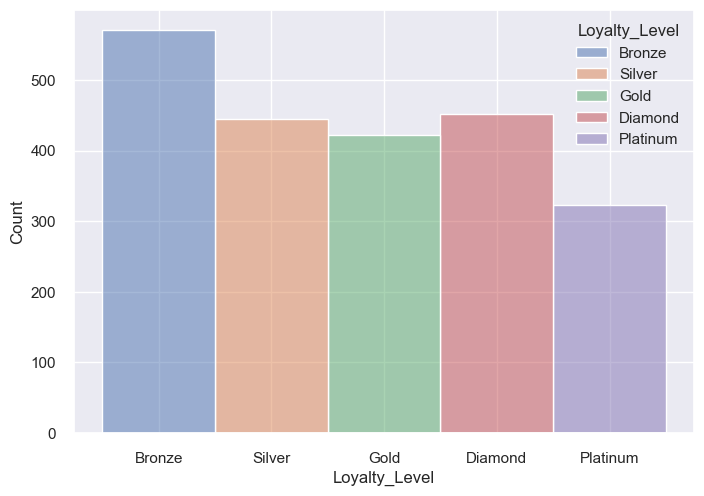

In [184]:
sns.histplot(data=RFM,x='Loyalty_Level',hue ='Loyalty_Level',bins =list(range(0,700,200)))

#### From the above histogram, It is seen that Bronze and Diamond customers are the majority.

Checking mean Recency, Frequency and Monetary values:-

In [185]:
RFM.groupby('Loyalty_Level').agg({
    'Recency':['mean','min','max'],
    'Frequency':['mean','min','max'],
    'Monetary':['mean', 'min','max']
}).round(1)

Recency         Frequency         Monetary           
                 mean min max      mean min max     mean  min   max
Loyalty_Level                                                      
Bronze           31.7   0  79       6.6   0  15     62.7    5   373
Silver           53.4   0  99      10.7   0  22    224.7    6  1901
Gold             41.2   0  98      17.5   8  31    723.6   64  2130
Diamond          54.1   0  99      20.9  10  44   1036.6  199  2525
Platinum         76.7  40  99      23.7  13  43   1343.1  416  2524


## Clustering 

#### Cluster Analysis is an exploratory technique aimed at identifying high density groups or clusters of observations that are more similar to each other than observations assigned to different clusters.

Visualising the distribution of Recency, Frequency and Monetary variables :-

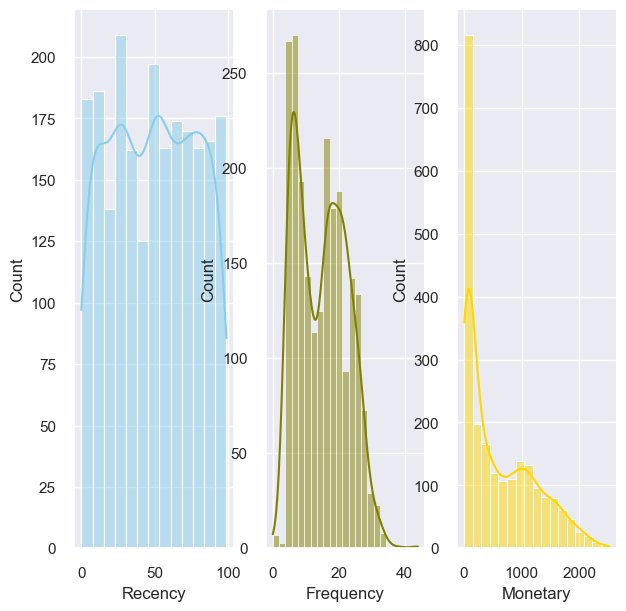

In [186]:
fig, axs = plt.subplots(1,3 ,figsize=(7, 7))

sns.histplot(data=RFM, x="Recency", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=RFM, x="Frequency", kde=True, color="olive", ax=axs[1])
sns.histplot(data=RFM, x="Monetary", kde=True, color="gold", ax=axs[2])

plt.show()

#### Checking the distribution of Recency ,Frequency and Monetary, it can be seen that the distribution is skewed.
#### Therefore to transform skewed data, applying log transformation:-

In [187]:
#creating a function to handle infinite values during log transformation:-
def handle_negative_values(num):
    if num <= 0:
        return 1
    else:
        return num
    
#Applying above function to the Recency,Frequency and Monetary values:-
RFM['Recency'] = [handle_negative_values(x) for x in RFM.Recency]
RFM['Frequency'] = [handle_negative_values(x) for x in RFM.Frequency]
RFM['Monetary'] = [handle_negative_values(x) for x in RFM.Monetary]

#Performing Log transformation to bring data into normal distribution
Log_RFM = RFM[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
Log_RFM.min()

Recency      0.000
Frequency    0.000
Monetary     1.609
dtype: float64

#### Before performing clusters, the variables are standardised using StandardScaler . Standardisation is important to prevent large scale variables from dominating the cluster formation.

Normalising the values :-

In [188]:
scaler = StandardScaler()
scaler.fit(Log_RFM)
scaled_RFM = pd.DataFrame(scaler.transform(Log_RFM),columns= Log_RFM.columns )
scaled_RFM.head()

,Recency,Frequency,Monetary
0,0.484112,1.110712,1.196311
1,0.071324,-1.213407,-1.563666
2,-0.300381,0.827323,0.701242
3,-0.300381,-0.745977,-1.109066
4,0.956569,0.662827,0.290482


#### One of the issues in clustering is that it will return clusters even if the data does not have any clusters . Therefore one must be confident that the dataset exhibits a tendency to cluster into natural groups. Hopkins Test is used to assess the clustering tendency.

Hopkins Test to check clustering tendency :-

In [189]:
   def hopkins(X):
    d = X.shape[1]
    
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

#### Null Hypothesis : Dataset is uniformly distibuted ( no meaningful clusters) 
#### Alternative Hypothesis : Dataset is randomly distributed ( consists of meaningful clusters)
####  We reject the null hypothesis if the value of H > 0.5

In [190]:
hopkins(scaled_RFM)

0.9352480207019558

##### Since the value is close to 1, we can conclude that the data contains meaningful clusters.

####  Before performing K-means clustering, the optimal number of clusters must be calculated using Elbow method. In addition Silhouette Score can also be used to validate the number of clusters.

#### Finding K value  :-

We need to find the number of clusters .
This can be done by either of 2 methods:
1) Elbow method  

2) Silhouette Score

Visualising elbow plot:-

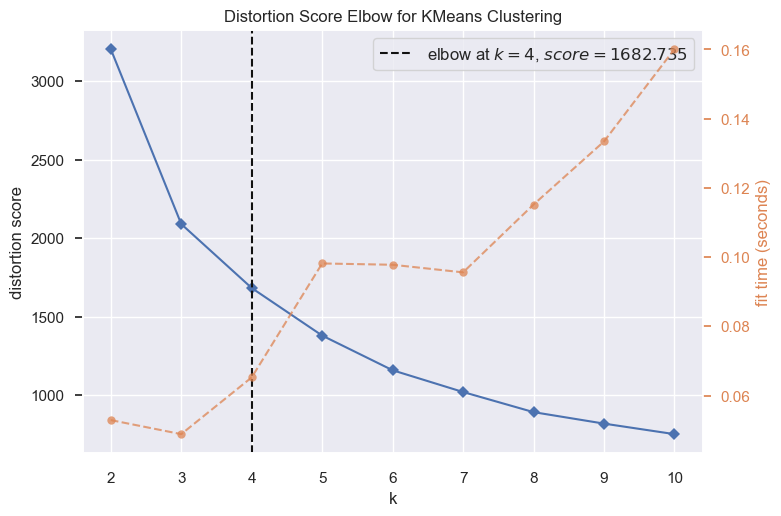

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [191]:
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(scaled_RFM)
Elbow_M.show()

The above cell indicates that 4 will be an optimal number of clusters for the data.

Also using Silhouette score method to check the optimal numbers:-

In [192]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(scaled_RFM)
    score = silhouette_score(scaled_RFM, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.49421695562336593
For cluster: 3, the silhouette score is: 0.51192534437067
For cluster: 4, the silhouette score is: 0.4728836050681346
For cluster: 5, the silhouette score is: 0.40796298474151527
For cluster: 6, the silhouette score is: 0.37055418385654215
For cluster: 7, the silhouette score is: 0.3407411292066014
For cluster: 8, the silhouette score is: 0.3509883562583978
For cluster: 9, the silhouette score is: 0.32880199600760684


In [193]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(scaled_RFM)
    score = silhouette_score(scaled_RFM, kmeans.labels_)
    silhouette_coefficients.append(score)

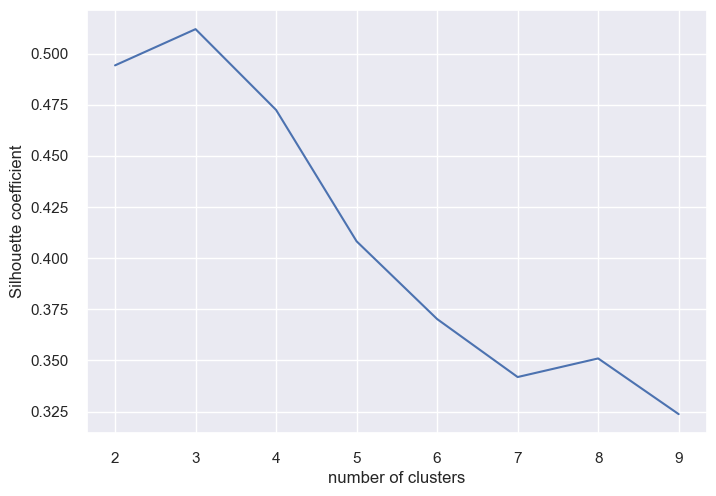

In [194]:
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

From the above plot, the number of clusters should be 3. Therefore we will be performing K-means for clusters = 3 and 4 .

## K-means clustering

Performing K means clustering:-

In [195]:
kmeans = KMeans(n_clusters=4)
RFM['kmeans_label_4'] = kmeans.fit_predict(scaled_RFM)
RFM[['R','F','M','RFM Score','RFM Value','Loyalty_Level','kmeans_label_4']] .head(10)

,R,F,M,RFM Score,RFM Value,Loyalty_Level,kmeans_label_4
0,3,5,5,355,13,Platinum,0
1,2,1,1,211,4,Bronze,1
2,2,4,4,244,10,Gold,0
3,2,2,1,221,5,Bronze,1
4,5,4,3,543,12,Diamond,0
5,1,4,4,144,9,Gold,2
6,2,4,3,243,9,Gold,0
7,2,2,2,222,6,Bronze,1
8,1,1,1,111,3,Bronze,3
9,4,1,1,411,6,Bronze,1


Visualising the clusters:-

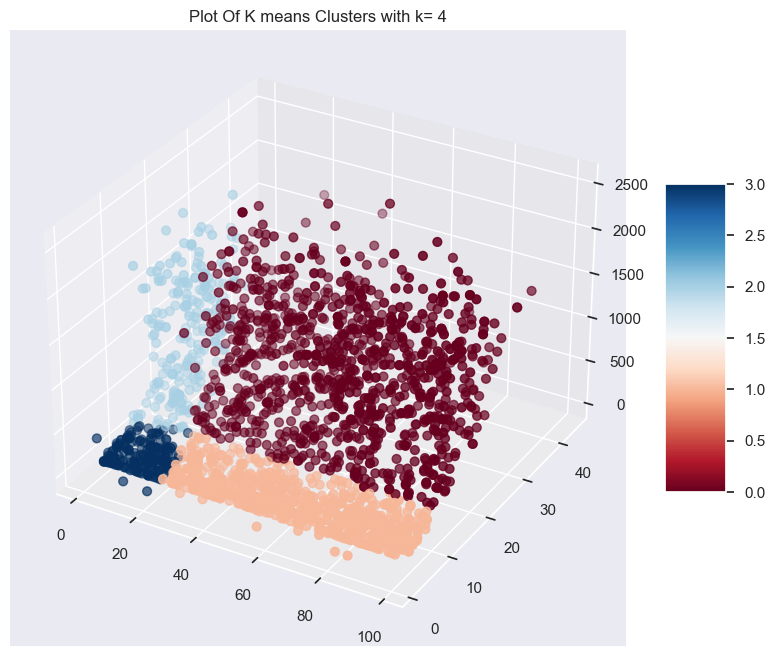

In [196]:
x = RFM['Recency']
y= RFM['Frequency']
z = RFM['Monetary']
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d') 
surf= ax.scatter(x, y, z, s=40, c=RFM["kmeans_label_4"], marker='o',cmap='RdBu')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Plot Of K means Clusters with k= 4")
plt.show()

Also performing kmeans with clusters=3

In [197]:
kmeans_3 = KMeans(n_clusters=3)
RFM['kmeans_label_3'] = kmeans_3.fit_predict(scaled_RFM)
RFM[['R','F','M','RFM Score','RFM Value','Loyalty_Level','kmeans_label_3']].head(10)

,R,F,M,RFM Score,RFM Value,Loyalty_Level,kmeans_label_3
0,3,5,5,355,13,Platinum,0
1,2,1,1,211,4,Bronze,1
2,2,4,4,244,10,Gold,0
3,2,2,1,221,5,Bronze,1
4,5,4,3,543,12,Diamond,0
5,1,4,4,144,9,Gold,0
6,2,4,3,243,9,Gold,0
7,2,2,2,222,6,Bronze,1
8,1,1,1,111,3,Bronze,1
9,4,1,1,411,6,Bronze,1


size count in each cluster:-

In [198]:
cluster_size= pd.DataFrame()
cluster_size['kmeans_size_4'] = RFM.groupby("kmeans_label_4").size().to_frame()
cluster_size

,kmeans_size_4
kmeans_label_4,
0,1085
1,710
2,230
3,187


In [199]:
cluster_size['kmeans_size_3'] = RFM.groupby("kmeans_label_3").size().to_frame()
cluster_size

,kmeans_size_4,kmeans_size_3
kmeans_label_4,,
0,1085,1125.0
1,710,817.0
2,230,270.0
3,187,NaN


Visualising kmeans clustering with clusters= 3 :-

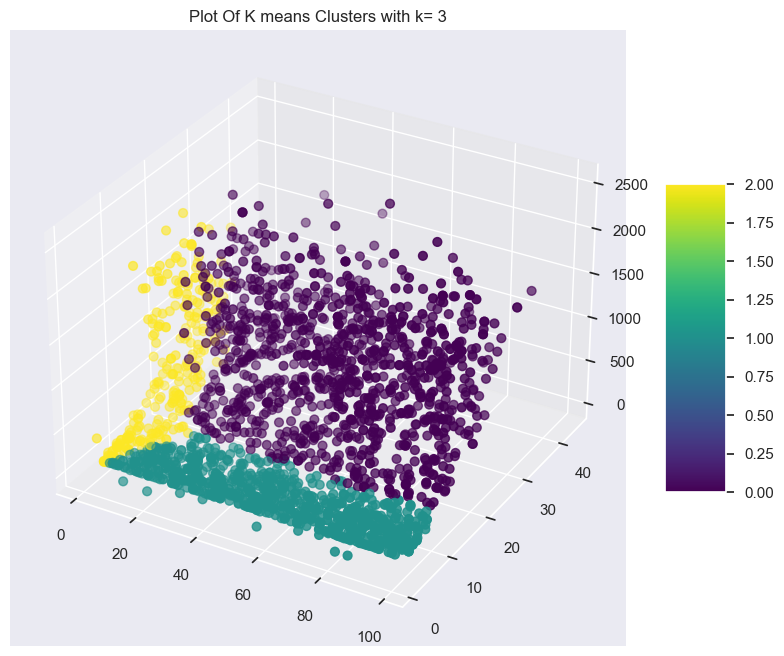

In [200]:
x = RFM['Recency']
y= RFM['Frequency']
z = RFM['Monetary']
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d') 
color=('red','green','blue')
surf= ax.scatter(x, y, z, s=40, c=RFM["kmeans_label_3"], marker='o', cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Plot Of K means Clusters with k= 3")
plt.show()

Distribution of clusters :-

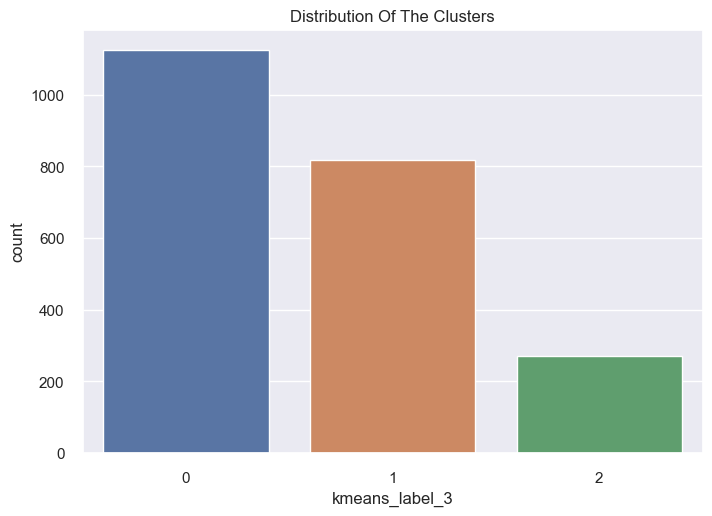

In [201]:
pl = sns.countplot(x=RFM["kmeans_label_3"])
pl.set_title("Distribution Of The Clusters")
plt.show()

## Agglomerative Clustering

Plotting a dendrogram to find the number of clusters:-

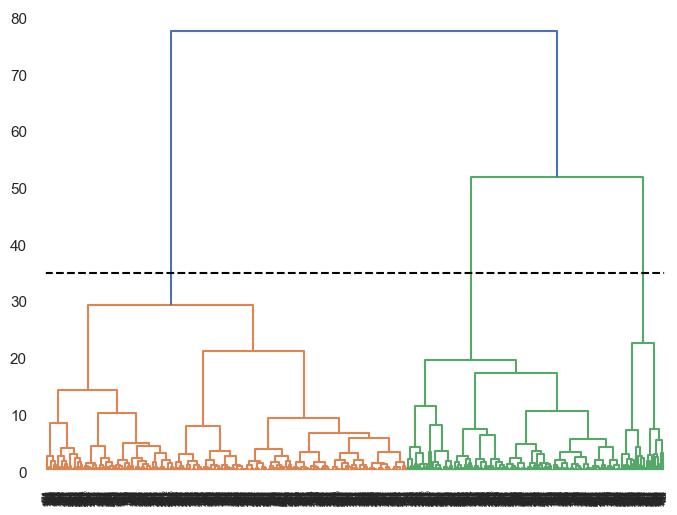

In [202]:
clusters = hierarchy.linkage(scaled_RFM, method = 'ward', metric='euclidean')
plt.figure(figsize=(8,6))
dendogram = dendrogram(clusters)
plt.axhline(color ='black',linestyle='--',y=35) 
plt.axhline(100,color ='crimson')

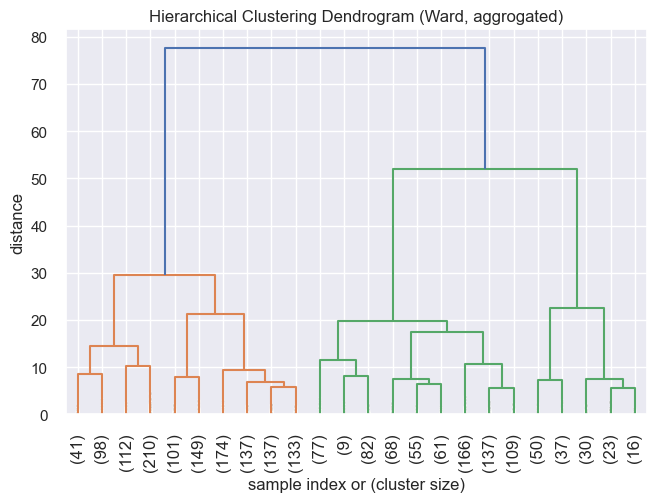

In [203]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    clusters,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

From the dendogram, we can see that there are 3 clusters .

In [204]:
AC_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
# fit model and predict clusters
RFM["AC_label_3"] = AC_3.fit_predict(scaled_RFM)
RFM[['R','F','M','RFM Score','RFM Value','Loyalty_Level','AC_label_3']] .head(10)

,R,F,M,RFM Score,RFM Value,Loyalty_Level,AC_label_3
0,3,5,5,355,13,Platinum,0
1,2,1,1,211,4,Bronze,2
2,2,4,4,244,10,Gold,0
3,2,2,1,221,5,Bronze,2
4,5,4,3,543,12,Diamond,0
5,1,4,4,144,9,Gold,0
6,2,4,3,243,9,Gold,0
7,2,2,2,222,6,Bronze,2
8,1,1,1,111,3,Bronze,2
9,4,1,1,411,6,Bronze,2


Cluster size for kmeans and agglomerative clustering:-

In [205]:
cluster_size['AC_size_3'] = RFM.groupby("AC_label_3").size().to_frame()
cluster_size

,kmeans_size_4,kmeans_size_3,AC_size_3
kmeans_label_4,,,
0,1085,1125.0,1292.0
1,710,817.0,156.0
2,230,270.0,764.0
3,187,NaN,NaN


Visualising Agglomerative clustering:-

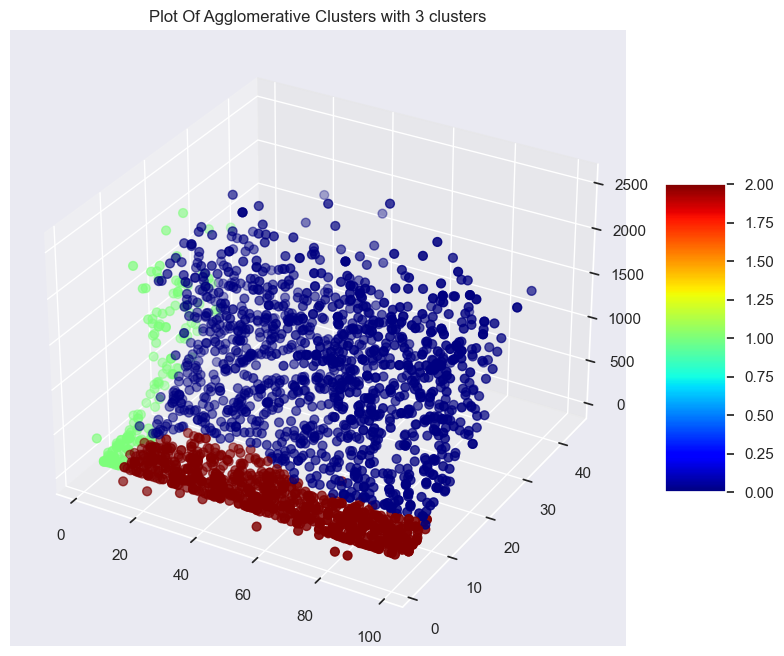

In [206]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d') 
surf= ax.scatter(x, y, z, s=40, c=RFM["AC_label_3"], marker='o',cmap='jet')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Plot Of Agglomerative Clusters with 3 clusters")
plt.show()

## DBSCAN Clustering

Setting MinPts as 2 * dimensions (6) to find the value of Eps.
Generating an elbow plot for finding the value of Eps- :-

<Figure size 1200x600 with 0 Axes>

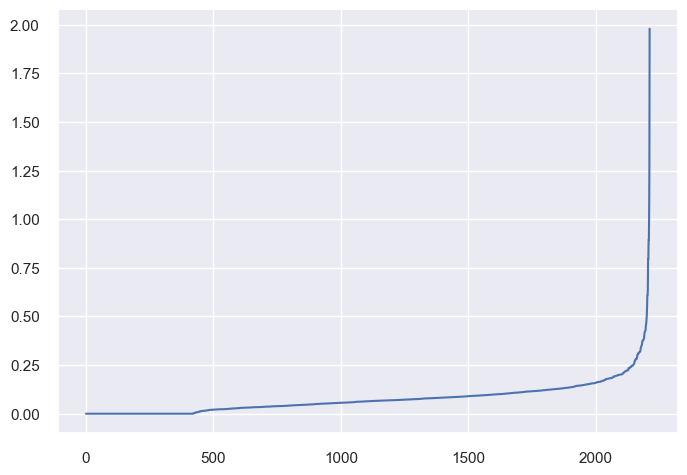

<Figure size 1200x600 with 0 Axes>

In [207]:
neighbours = NearestNeighbors(n_neighbors = 6)
knn_data = neighbours.fit(scaled_RFM)

distances, indices = knn_data.kneighbors(scaled_RFM)

sorting_distance = np.sort(distances, axis = 0)

sorted_distance = sorting_distance[:,1]
plt.plot(sorted_distance)

plt.figure(figsize = (12,6))

In [208]:
min_samples = range(6,19)
eps = np.arange(0.25,0.60, 0.01)

iterating on different combinations of eps and minPts :-

In [209]:
output = []

for x in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=x, eps = ep).fit(scaled_RFM).labels_
        score = silhouette_score(scaled_RFM, labels)
        output.append((x, ep, score))

selecting the eps and MinPts with best silhouette score :-

In [210]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.46340996716877064
min_samples: 17
eps: 0.5600000000000003


In [211]:
clusters = DBSCAN(eps= 0.56, min_samples= 17).fit(scaled_RFM)
RFM['DBSCAN_label'] = clusters.labels_
set(clusters.labels_)

{-1, 0}

Here -1 indicates the outliers/noise. Therefore there is one cluster.

In [212]:
RFM['DBSCAN_label'].value_counts()

 0    2112
-1     100
Name: DBSCAN_label, dtype: int64

In [213]:
RFM[['R','F','M','RFM Score','RFM Value','Loyalty_Level','DBSCAN_label']] .head(10)

,R,F,M,RFM Score,RFM Value,Loyalty_Level,DBSCAN_label
0,3,5,5,355,13,Platinum,0
1,2,1,1,211,4,Bronze,0
2,2,4,4,244,10,Gold,0
3,2,2,1,221,5,Bronze,0
4,5,4,3,543,12,Diamond,0
5,1,4,4,144,9,Gold,0
6,2,4,3,243,9,Gold,0
7,2,2,2,222,6,Bronze,0
8,1,1,1,111,3,Bronze,0
9,4,1,1,411,6,Bronze,-1


In [215]:
cluster_size['DBSCAN'] = RFM.groupby("DBSCAN_label").size().to_frame()
cluster_size

,kmeans_size_4,kmeans_size_3,AC_size_3,DBSCAN
kmeans_label_4,,,,
0,1085,1125.0,1292.0,2112.0
1,710,817.0,156.0,NaN
2,230,270.0,764.0,NaN
3,187,NaN,NaN,NaN


Visualising DBSCAN clusters:-

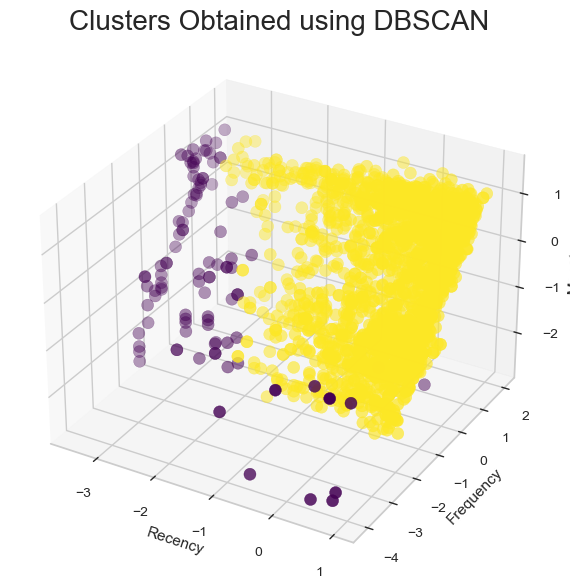

In [70]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(scaled_RFM["Recency"],scaled_RFM["Frequency"],scaled_RFM["Monetary"],
               c = clusters.labels_, cmap ="viridis",s = 75)       
plt.title('Clusters Obtained using DBSCAN',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.show()

## Evaluating the models :-

Checking the distribution of the models:-

In [216]:
cluster_size[['kmeans_size_4','kmeans_size_3','AC_size_3','DBSCAN']]

,kmeans_size_4,kmeans_size_3,AC_size_3,DBSCAN
kmeans_label_4,,,,
0,1085,1125.0,1292.0,2112.0
1,710,817.0,156.0,NaN
2,230,270.0,764.0,NaN
3,187,NaN,NaN,NaN


Defining a function for calculating Davies-Bouldin Index, Silhouette Score and Calinski-Harabasz Index :-

In [217]:
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    return db_index, s_score, ch_index


Metrics for K means clustering with clusters = 4 :-

In [218]:
labels_kmeans_4 = RFM.kmeans_label_4
db_kmeans_4, ss_kmeans_4, ch_kmeans_4 = evaluate_clustering(scaled_RFM, labels_kmeans_4)
print(db_kmeans_4,ss_kmeans_4,ch_kmeans_4)

0.861 0.473 2166.446


Metrics for K means clustering with clusters = 3 :-

In [219]:
labels_kmeans_3 = RFM.kmeans_label_3
db_kmeans_3, ss_kmeans_3, ch_kmeans_3 = evaluate_clustering(scaled_RFM, labels_kmeans_3)

print(db_kmeans_3,ss_kmeans_3,ch_kmeans_3)

0.793 0.512 2402.815


Metrics for Agglomerative clustering with clusters = 3 :-

In [220]:
labels_AC_3 = RFM.AC_label_3
db_AC_3, ss_AC_3, ch_AC_3 = evaluate_clustering(scaled_RFM, labels_AC_3)

print(db_AC_3,ss_AC_3,ch_AC_3)

0.742 0.507 2116.627


Metrics for DBSCAN clustering :-

In [221]:
labels_DBSCAN = RFM.DBSCAN_label
db_DBSCAN, ss_DBSCAN, ch_DBSCAN = evaluate_clustering(scaled_RFM,labels_DBSCAN)

print(db_DBSCAN,ss_DBSCAN,ch_DBSCAN)

1.073 0.463 334.587


Converting it to a dataframe:-

In [222]:
Evaluate = pd.DataFrame({'Model': ['K-Means_4', 'K-Means_3', 'Hierarchical Clustering_3','DBSCAN Clustering'], 
                        'Davies-Bouldin Index': [db_kmeans_4, db_kmeans_3, db_AC_3,db_DBSCAN],
                        'Silhouette Score': [ss_kmeans_4, ss_kmeans_3, ss_AC_3,ss_DBSCAN],
                       'Calinski-Harabasz Index': [ch_kmeans_4, ch_kmeans_3, ch_AC_3,ch_DBSCAN]})

In [223]:
Evaluate.sort_values(by='Model', ascending=False).style.background_gradient(cmap='inferno_r').hide_index().set_properties(**{'font-family': 'Segoe UI'})

C:\Users\User\AppData\Local\Temp\ipykernel_6176\1921043162.py:1: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



Model,Davies-Bouldin Index,Silhouette Score,Calinski-Harabasz Index
K-Means_4,0.861000,0.473000,2166.446000
K-Means_3,0.793000,0.512000,2402.815000
Hierarchical Clustering_3,0.742000,0.507000,2116.627000
DBSCAN Clustering,1.073000,0.463000,334.587000


From the above results, it is seen that K-means with 3 clusters perform the best among the clustering algorithms reviewed.

Distribution of K-means clustering with clusters = 3:-

<AxesSubplot: xlabel='kmeans_label_3', ylabel='count'>

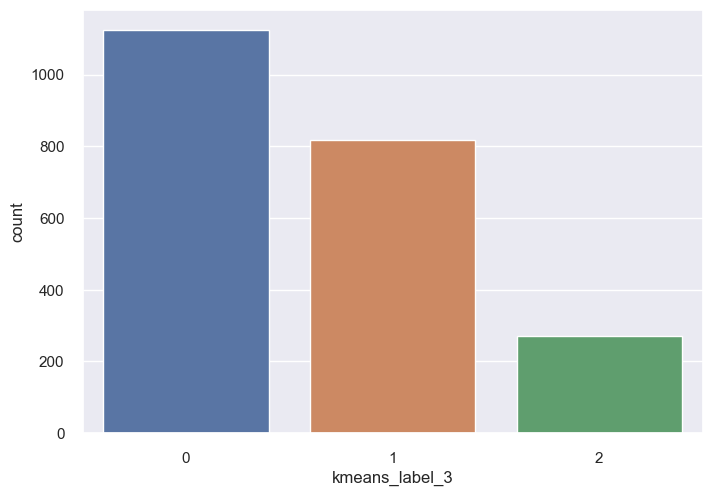

In [224]:
sns.countplot(x=RFM["kmeans_label_3"])

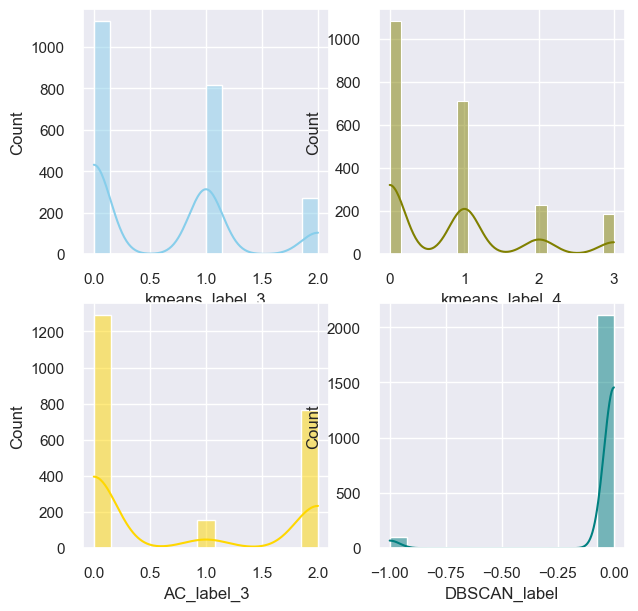

In [225]:
# distribution of different clustering

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=RFM, x="kmeans_label_3", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=RFM, x="kmeans_label_4", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=RFM, x="AC_label_3", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=RFM, x="DBSCAN_label", kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [226]:
RFM.groupby('kmeans_label_3').mean()

,ID,Recency,Frequency,Monetary,R,F,M,RFM Value,kmeans_label_4,AC_label_3,DBSCAN_label
kmeans_label_3,,,,,,,,,,,
0,1120.091556,56.712000,20.335111,986.072889,3.351111,3.952889,4.016000,11.320000,0.064889,0.001778,0.000000
1,1123.860465,52.755202,6.942472,67.864137,3.145655,1.375765,1.505508,6.026928,1.279070,1.865361,-0.023256
2,1128.733333,5.766667,16.277778,661.111111,1.000000,3.159259,3.274074,7.433333,2.270370,0.585185,-0.300000


Checking the distribution of Recency, Frequency and Monetary values in different clusters:-

<AxesSubplot: xlabel='kmeans_label_3', ylabel='Monetary'>

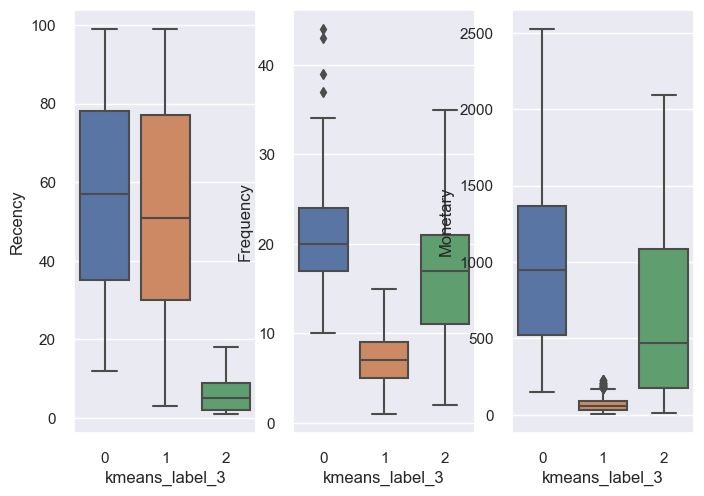

In [233]:
sns.set()

#define plotting region (1 row, 3 columns)

fig, axes = plt.subplots(1, 3)

#create boxplot in each subplot
sns.boxplot(data=RFM, x='kmeans_label_3', y='Recency', ax=axes[0])
sns.boxplot(data=RFM, x='kmeans_label_3', y='Frequency', ax=axes[1])
sns.boxplot(data=RFM, x='kmeans_label_3', y='Monetary', ax=axes[2])


From the above plot, The following can be seen:-
    
Cluster 0 has high recency, frequency and monetary.

Cluster 1 has high recency and low frequency and monetary.

Cluster 2 has low recency and good frequency and monetary value.

Checking the descriptive statistics in each cluster:

In [82]:
final_RFM_cluster0 = RFM[(RFM['kmeans_label_3'] == 0)].reset_index()  
final_RFM_cluster0.describe() 

,index,ID,Recency,Frequency,Monetary,R,F,M,RFM Value,kmeans_label_4,kmeans_label_3,AC_label_3,DBSCAN_label
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.0,1125.000000,1125.0
mean,1103.069333,1120.091556,56.712000,20.335111,986.072889,3.351111,3.952889,4.016000,11.320000,1.958222,0.0,0.001778,0.0
std,629.320840,633.027370,24.521229,4.999881,531.145638,1.235705,0.887088,0.830744,1.879559,0.229180,0.0,0.059628,0.0
min,0.000000,0.000000,12.000000,10.000000,149.000000,1.000000,2.000000,2.000000,7.000000,0.000000,0.0,0.000000,0.0
25%,575.000000,591.000000,35.000000,17.000000,521.000000,2.000000,3.000000,3.000000,10.000000,2.000000,0.0,0.000000,0.0
50%,1089.000000,1105.000000,57.000000,20.000000,946.000000,3.000000,4.000000,4.000000,11.000000,2.000000,0.0,0.000000,0.0
75%,1649.000000,1669.000000,78.000000,24.000000,1366.000000,4.000000,5.000000,5.000000,13.000000,2.000000,0.0,0.000000,0.0
max,2209.000000,2237.000000,99.000000,44.000000,2525.000000,5.000000,5.000000,5.000000,15.000000,2.000000,0.0,2.000000,0.0


In [85]:
final_RFM_cluster1 = RFM[(RFM['kmeans_label_3'] == 1)].reset_index()  
final_RFM_cluster1.describe() 

,index,ID,Recency,Frequency,Monetary,R,F,M,RFM Value,kmeans_label_4,kmeans_label_3,AC_label_3,DBSCAN_label
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.0,818.000000,818.000000
mean,1105.867971,1122.903423,52.704156,6.943765,67.951100,3.143032,1.376528,1.506112,6.025672,0.421760,1.0,1.865526,-0.023227
std,649.099719,653.035195,26.822286,2.304647,47.151181,1.355105,0.494807,0.537993,1.660419,1.043422,0.0,0.486297,0.150717
min,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.0,0.000000,-1.000000
25%,533.250000,549.250000,30.000000,5.000000,34.000000,2.000000,1.000000,1.000000,5.000000,0.000000,1.0,2.000000,0.000000
50%,1128.000000,1144.000000,51.000000,7.000000,55.000000,3.000000,1.000000,1.000000,6.000000,0.000000,1.0,2.000000,0.000000
75%,1664.500000,1684.500000,77.000000,9.000000,89.000000,4.000000,2.000000,2.000000,7.000000,0.000000,1.0,2.000000,0.000000
max,2211.000000,2239.000000,99.000000,15.000000,227.000000,5.000000,3.000000,3.000000,10.000000,3.000000,1.0,2.000000,0.000000


In [86]:
final_RFM_cluster2 = RFM[(RFM['kmeans_label_3'] == 2)].reset_index() 
final_RFM_cluster2.describe() 

,index,ID,Recency,Frequency,Monetary,R,F,M,RFM Value,kmeans_label_4,kmeans_label_3,AC_label_3,DBSCAN_label
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.0,269.000000,269.000000,269.000000,269.000000,269.0,269.000000,269.000000
mean,1114.546468,1131.661710,5.747212,16.308550,663.052045,1.0,3.163569,3.278810,7.442379,1.535316,2.0,0.579926,-0.301115
std,647.966056,651.943931,4.070650,6.698571,558.300417,0.0,1.282493,1.237006,2.350259,0.887127,0.0,0.537863,0.459598
min,22.000000,23.000000,1.000000,2.000000,8.000000,1.0,1.000000,1.000000,3.000000,1.000000,2.0,0.000000,-1.000000
25%,538.000000,554.000000,2.000000,11.000000,178.000000,1.0,2.000000,2.000000,5.000000,1.000000,2.0,0.000000,-1.000000
50%,1077.000000,1093.000000,5.000000,17.000000,473.000000,1.0,3.000000,3.000000,8.000000,1.000000,2.0,1.000000,0.000000
75%,1668.000000,1688.000000,9.000000,21.000000,1091.000000,1.0,4.000000,4.000000,10.000000,3.000000,2.0,1.000000,0.000000
max,2210.000000,2238.000000,18.000000,35.000000,2092.000000,1.0,5.000000,5.000000,11.000000,3.000000,2.0,2.000000,0.000000


# Cluster Profiling:-

## Cluster 0 consists of customers with high monetary value, high recency value and high frequency value. Therefore these customers are the ones who earns top scores in all categories. They are devoted, willing to spend lavishly, and are likely to make another purchase soon. These customers are likely to respond to loyalty programs. They would be interested in newly launched products. Since these customers are loyal to the brand and the products, it makes less business sense to offer them discounts. Instead, their Customer Lifetime Value (CLV) can be increased by recommending high-ticket items and products based on previous purchases.

## Cluster 1 includes customers with very low monetary value, low frequency value and high recency value. These customers are more likely to respond to product recommendations  based on previous purchases as well as incentives tied to spending thresholds such as free shipping or free gift if the transaction is above the brand’s average order value.

## Cluster 2 includes customers with good monetary value , good frequency value and low recency value. These are the customers who have been in the top tier previously but now they score less in recency. These are the customers which are at risk of losing. They should be targeted with retention messages such as discounted prices, latest product launches and exclusive offers. 
